# Satisfying Two "Minimum Distance From Point" Constraints on Camera Paths

In [220]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [237]:
%matplotlib inline
import matplotlib
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as mpatches
import numpy as np
import numpy.linalg as la

def add_relative_to_current_source_file_path_to_sys_path(relpath):
    import os, sys, inspect
    path = os.path.realpath(os.path.abspath(os.path.join(os.path.split(inspect.getfile(inspect.currentframe()))[0],relpath)))
    if path not in sys.path:
        sys.path.insert(0,path)

add_relative_to_current_source_file_path_to_sys_path("../../shims/toric")   

import toric
import toric.samples
import toric.shims

In [238]:
def slerp(p0, p1, t):
        omega = np.arccos(np.dot(p0/np.linalg.norm(p0), p1/np.linalg.norm(p1)))
        so = np.sin(omega)
        return np.sin((1.0-t)*omega) / so * p0 + np.sin(t*omega)/so * p1

def drawSetup(fudgeX=2, fudgeY_pos=2,fudgeY_neg=8):
    pylab.rcParams['figure.figsize'] = 8, 8

    plt.axes().set_aspect('equal')
    fig = plt.gcf()
    
    # Set up plot size
    plt.axes().set_xlim((np.min([PA_1.x(), PB_1.x()])-fudgeX,np.max([PA_1.x(), PB_1.x()])+fudgeX))
    plt.axes().set_ylim((np.min([PA_1.y(), PB_1.y()])-fudgeY_neg,np.max([PA_1.y(), PB_1.y()])+fudgeY_pos))

    # Draw People Positions
    plt.scatter([PA_1.x(), PB_1.x()],[PA_1.y(), PB_1.y()],c="red",linewidths=0)
    line_AB = plt.Line2D([PA_1.x(), PB_1.x()],[PA_1.y(), PB_1.y()], c="black",alpha=0.3)
    fig.gca().add_artist(line_AB)

    # Draw Circles    
    circle_PA_1=plt.Circle((PA_1.x(),PA_1.y()),min_dist,color='g',alpha=0.5)
    circle_PB_1=plt.Circle((PB_1.x(),PB_1.y()),min_dist,color='g',alpha=0.5)
    
    fig.gca().add_artist(circle_PA_1)
    fig.gca().add_artist(circle_PB_1)

    plt.annotate(s="A", xy=(PA_1.x(),PA_1.y()),xytext=(3,4),textcoords="offset points")
    plt.annotate(s="B", xy=(PB_1.x(),PB_1.y()),xytext=(3,4),textcoords="offset points")
    
    # Draw Camera positions
    plt.scatter([C_0.x(), C_1.x()],[C_0.y(), C_1.y()],c="blue",linewidths=0)
    plt.annotate(s="C0", xy=(C_0.x(), C_0.y()),xytext=(3,4),textcoords="offset points")
    plt.annotate(s="C1", xy=(C_1.x(), C_1.y()),xytext=(3,4),textcoords="offset points")

    

# Example Problem Setup: Find a Path from C0 to C1, avoiding green circles.

### Why this specific arrangement?

I like this arrangement as a toy problem for the following reasons:

* A simple linear interpolation clearly violates the safety circle.
* $C0$ to $C1$ stays on the same side of the line of action $AB$.
* $C0$, $C1$, $B$ almost lies in a straight line. This means that, from the perspective of $B$, the vantage vector $B-C(u)$ does not undergo a change in direction, only in distance. This simplifies thinking about the problem.
* $C0$ to $C1$ undergoes a large change in the vantage vector $A-C(u)$ direction, but no change in distance. This also simplifies thinking about the problem.

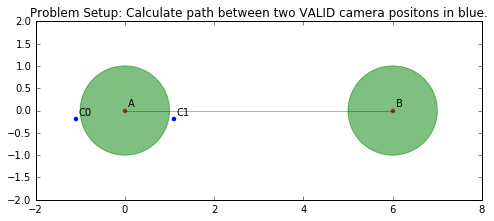

In [239]:
min_dist = 1                    # let's set a minimum distance of 1m
PA_1 = toric.Vector3(0,0,0)     # person A position
PB_1 = toric.Vector3(6,0,0)     # person B position
C_0 = toric.Vector3(-1.1,-0.2,0)  # Starting camera position is *outside* of PA_1
C_1 = toric.Vector3( 1.1,-0.2,0)    # Ending camera position

drawSetup(fudgeY_neg=2)
plt.title("Problem Setup: Calculate path between two VALID camera positons in blue.")

# Consider interpolating from C0 to C1 in the Toric space

**Conclusion:** Minimum distance constraint violated

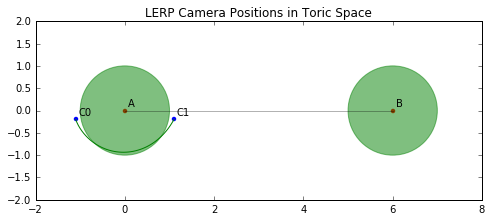

In [240]:
drawSetup(fudgeY_neg=2)

def map_toric_to_cam(a):
    t = toric.Toric3(toric.RadianPi(a[0]),toric.Radian2Pi(a[1]),toric.RadianPi(a[2]))
    return toric.Toric3_ToWorldPositionNP(t, PA_1, PB_1)

C_0_toric = toric.Toric3_FromWorldPosition(C_0,PA_1,PB_1)
C_1_toric = toric.Toric3_FromWorldPosition(C_1,PA_1,PB_1)


alpha_lin, theta_lin, phi_lin = linspace_toric(
    C_0_toric.getAlpha().valueRadians(),
    C_1_toric.getAlpha().valueRadians(),
    C_0_toric.getTheta().valueRadians(),
    C_1_toric.getTheta().valueRadians(),
    C_0_toric.getPhi().valueRadians(),
    C_1_toric.getPhi().valueRadians())
    
P = np.c_[ alpha_lin, theta_lin, phi_lin ]
C = np.apply_along_axis(map_toric_to_cam, axis=1, arr=P)

plt.plot(C[:,0],C[:,1], c="green")

plt.title("LERP Camera Positions in Toric Space")

# Consider interpolating from C0 to C1 in the Toric Space, with AB Flipped

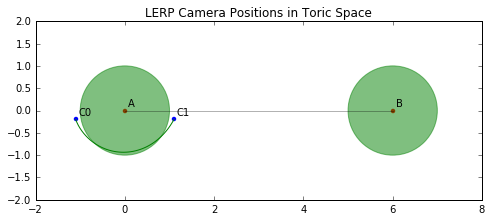

In [241]:
drawSetup(fudgeY_neg=2)

def map_toric_to_cam(a):
    t = toric.Toric3(toric.RadianPi(a[0]),toric.Radian2Pi(a[1]),toric.RadianPi(a[2]))
    return toric.Toric3_ToWorldPositionNP(t, PB_1, PA_1)

C_0_toric = toric.Toric3_FromWorldPosition(C_0,PB_1,PA_1)
C_1_toric = toric.Toric3_FromWorldPosition(C_1,PB_1,PA_1)


alpha_lin, theta_lin, phi_lin = linspace_toric(
    C_0_toric.getAlpha().valueRadians(),
    C_1_toric.getAlpha().valueRadians(),
    C_0_toric.getTheta().valueRadians(),
    C_1_toric.getTheta().valueRadians(),
    C_0_toric.getPhi().valueRadians(),
    C_1_toric.getPhi().valueRadians())
    
P = np.c_[ alpha_lin, theta_lin, phi_lin ]
C = np.apply_along_axis(map_toric_to_cam, axis=1, arr=P)

plt.plot(C[:,0],C[:,1], c="green")

plt.title("LERP Camera Positions in Toric Space")

# Consider Interpolating from C0 to C1 by blending two polar coordinate interpolations around A and B.

## That is, prove that our transition trajectories maintains minimum distance constraint to both subjects when we interpolate in "visual feature space" [Lino et al]

### Problem Setup:

Given two subjects $\vec{A}$ and $\vec{B}$ and a starting and ending camera position $\vec{C}_0$ and $\vec{C}_1$, calculate a path $\vec{\sigma}(u)$ where $\vec{\sigma}(0) = \vec{C}_0$ and $\vec{\sigma}(1) = \vec{C}_1$. All vectors are in world space $(x,y,z)$. 

$\vec{\sigma}(u)$ needs to satisfy two minimum distance constraints:

$$
\begin{align}
\|\vec{\sigma}(u) - \vec{A}\| && > && d_m \\
\|\vec{\sigma}(u) - \vec{B}\| && > && d_m
\end{align}
$$

We will calculate $\vec{\sigma}(u)$ as follows:

Consider the simplified interpolation space $(\vec{v}_A(u),\vec{v}_B(u),d_A(u),d_B(u))$ where $\vec{v}_i(u)$ is an interpolation function producting a unit "vantage" vector and $d_i(u)$ is a interpolation function producing a distance along the unit "vantage" vector. 

That is:

$$
\begin{align}
d_A(0) & = \|\vec{C}_0\ - \vec{A}\| \\
d_A(1) & = \|\vec{C}_1\ - \vec{A}\| \\
d_A(u) & = (1 - u)*d_A(0)  + u*d_A(1) \\
\vec{v}_A(0) & = \frac{\vec{C}_0 - \vec{A}}{\|\vec{C}_0 - \vec{A}\|} \\
\vec{v}_A(1) & = \frac{\vec{C}_1 - \vec{A}}{\|\vec{C}_1 - \vec{A}\|} \\
\vec{v}_A(u) & = SLERP(\vec{v}_i(0),\vec{v}_i(1); u)  
\end{align}
$$

and equivalent for $d_B$ and $\vec{v}_B$, where 

$$
u \in (0,1)
$$

### First Consider the Simplified Interpolation Function

We define $\vec{\sigma}(u)$ as

$$
\begin{align}
\vec{\sigma}(u) & = \frac{1}{2}[\vec{A} + \vec{B} + \sum_{i \in (A,B)} d_i(u)\cdot\vec{v}_i(u)] \\
\vec{\sigma}(u) & = \frac{1}{2}[\vec{A} + \vec{B} + d_A(u) \cdot \vec{v}_A(u) + d_B(u) \cdot \vec{v}_B(u)]
\end{align}
$$

Notice this is a simplified version of $F_{A,B}(x)$ presented in Lino et al

### Prove that $\vec{\sigma}(u)$ maintains constraints under certain restrictions on $\vec{C}_0$ and $\vec{C}_1$

Manipulate $\vec{\sigma}(u)$:

$$
\vec{\sigma}(u) = \frac{\vec{\sigma}_A(u) + \vec{\sigma}_B(u)}{2}
$$

where

$$
\begin{align}
\vec{\sigma}_A(u) & = \vec{A} + d_A(u)\vec{v}_A(u) \\
\vec{\sigma}_B(u) & = \vec{B} + d_B(u)\vec{v}_B(u) \\
\end{align}
$$

That is, we consider separately interpolating the components of $\vec{\sigma}(u)$ relating to person $A$ and person $B$

#### Restriction: Consider the case where $\vec{C}_0$ and $\vec{C}_1$ are both on the same side of the line $AB$. 

This occurs when $\vec{v}_A(u) \cdot \text{normal}(B-A)$ and $\vec{v}_B(u) \cdot \text{normal}(B-A)$ have the same sign.


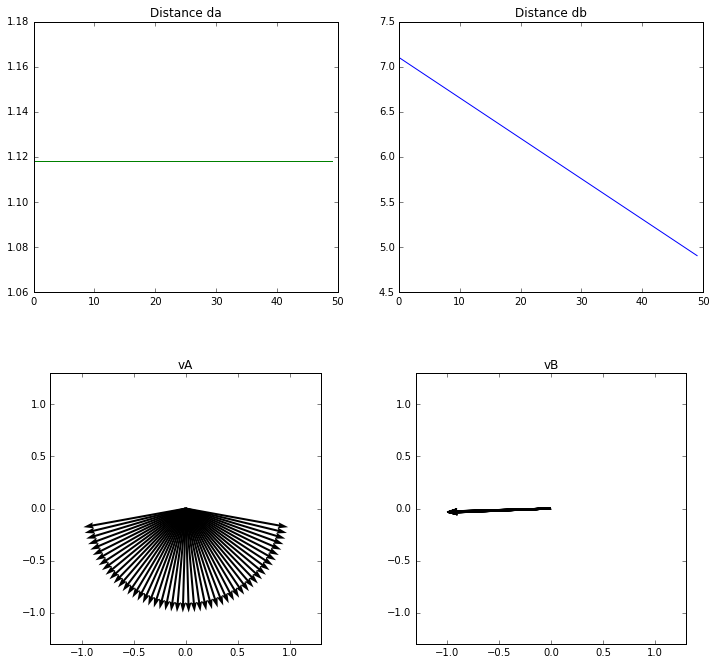

In [242]:
# Create Numpy arrays
A = PA_1.np()
B = PB_1.np()
C0 = C_0.np()
C1 = C_1.np()

# Set up interpolation vector
u = np.c_[np.linspace(0,1)]

# Set up the distance components of sigmaA, sigmaB
dA0 = la.norm(C0 - A)
dA1 = la.norm(C1 - A)
dB0 = la.norm(C0 - B)
dB1 = la.norm(C1 - B)

dA = np.linspace(dA0, dA1)
dB = np.linspace(dB0, dB1)

# Set up the vantage vector components of sigmaA, sigmaB
vA0 = (C0 - A) / dA0
vA1 = (C1 - A) / dA1
vB0 = (C0 - B) / dB0
vB1 = (C1 - B) / dB1

vA = np.apply_along_axis(lambda u : slerp(vA0,vA1,u), axis=1, arr=u)
vB = np.apply_along_axis(lambda u : slerp(vB0,vB1,u), axis=1, arr=u)

# Set up sigmaA, sigmaB, sigma
sigmaA = A + dA[:,np.newaxis] * vA
sigmaB = B + dB[:,np.newaxis] * vB
sigma = (sigmaA + sigmaB) / 2

#
# Graphing the various components of Sigma
#
pylab.rcParams['figure.figsize'] = 12, 16
from matplotlib import gridspec
gs = gridspec.GridSpec(2, 2, width_ratios=[1,1], height_ratios=[1,1,1]) 
fig = plt.figure()

f1 = fig.add_subplot(gs[0])
f2 = fig.add_subplot(gs[1])
f3 = fig.add_subplot(gs[2])
f4 = fig.add_subplot(gs[3])

f1.plot(dA,c="green")
f1.set_title("Distance da")
f2.plot(dB,c="blue")
f2.set_title("Distance db")

f3.quiver(np.linspace(0,0), np.linspace(0,0), vA[:,0],vA[:,1],angles='xy',scale_units='xy',scale=1)
f3.set_ylim([-1.3,1.3])
f3.set_xlim([-1.3,1.3])
f3.set_title("vA")
f3.set_aspect('equal')

f4.quiver(np.linspace(0,0), np.linspace(0,0), vB[:,0],vB[:,1],angles='xy',scale_units='xy',scale=1)
f4.set_ylim([-1.3,1.3])
f4.set_xlim([-1.3,1.3])
f4.set_title("vB")
f4.set_aspect('equal')


## False! Counterexample!

Given a valid start and end camera positions, both on the same side of the line AB, our simplified $\vec{\sigma}(u)$ *doesn't work*.

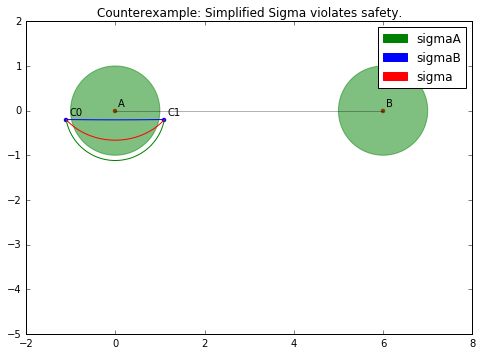

In [243]:

drawSetup(fudgeY_neg=5)
plt.plot(sigmaA[:,0],sigmaA[:,1], c="green")
plt.plot(sigmaB[:,0],sigmaB[:,1], c="blue")
plt.plot(sigma[:,0], sigma[:,1],  c="red")
plt.title("Counterexample: Simplified Sigma violates safety.")

sA_legend = mpatches.Patch(color="green", label="sigmaA")
sB_legend = mpatches.Patch(color="blue", label="sigmaB")
S_legend  = mpatches.Patch(color="red", label="sigma")
plt.legend(handles=[sA_legend,sB_legend,S_legend])


# Consider Interpolating from C0 to C1 using the Full Interpolation Function from Lino et al

We define $\vec{\sigma}(u)$ as

$$
\vec{\sigma}(u) = \frac{1}{2}[\vec{A} + \vec{B} + \sum_{i \in (A,B)} \vec{v}_i(u) \cdot \frac{d_i(u) + a_{i}(u) \cdot \lambda_i(u)}{1 + \lambda_i(u)}] \\
$$ 

Where we are introducing two new terms. $\lambda_i(u) \in (0,1)$ and $a_{i}(u)$. 

$$
\begin{align}
\lambda_i(u) = \sin(\text{angle between } \vec{v}_i \text{ and } AB) = \frac{\|\vec{v}_i \times AB\|}{\|\vec{v}_i\|\|AB\|}
\end{align}
$$

Notice:

*  if $\lambda_i(u) == 0$, then this full version of $\vec{\sigma}(u)$ is equivalent to the simplified version. 
*  if $\lambda_i(u) == 1$, then the vantage vector $\vec{v}_i(u)$ is scaled by the average of $d_i(u)$ and $a_{i}(u)$

**All the magic lies in $a_{i}(u)$**

Note: It's unclear exactly how Lino et al calculates $a_{i}(u)$ (Lino calls it $d_{i}^{\alpha,x}$)

It appears that Lino calculates the interpolated toric space between $C0$ and $C1$ as $C(u)$, and sets $a_{i}(u)$ as the distance between $C(u)$ and the respective person, where $i \in (A,B)$.

I will first use this approach.

#### Prove that $\vec{\sigma}(u)$ maintains constraints under certain restrictions on $\vec{C}_0$ and $\vec{C}_1$

Manipulate $\vec{\sigma}(u)$:

$$
\vec{\sigma}(u) = \frac{\vec{\sigma}_A(u) + \vec{\sigma}_B(u)}{2}
$$

where

$$
\begin{align}
\vec{\sigma}_A(u) & = \vec{A} + \vec{v}_A(u) \cdot \frac{d_A(u) + a_{A}(u) \cdot \lambda_A(u)}{1 + \lambda_A(u)} \\
\vec{\sigma}_B(u) & = \vec{B} + \vec{v}_B(u) \cdot \frac{d_B(u) + a_{B}(u) \cdot \lambda_B(u)}{1 + \lambda_B(u)} \\
\end{align}
$$

That is, we consider separately interpolating the components of $\vec{\sigma}(u)$ relating to person $A$ and person $B$

#### Restriction: Consider the case where $\vec{C}_0$ and $\vec{C}_1$ are both on the same side of the line $AB$. 

This occurs when $\vec{v}_A(u) \cdot \text{normal}(B-A)$ and $\vec{v}_B(u) \cdot \text{normal}(B-A)$ have the same sign.


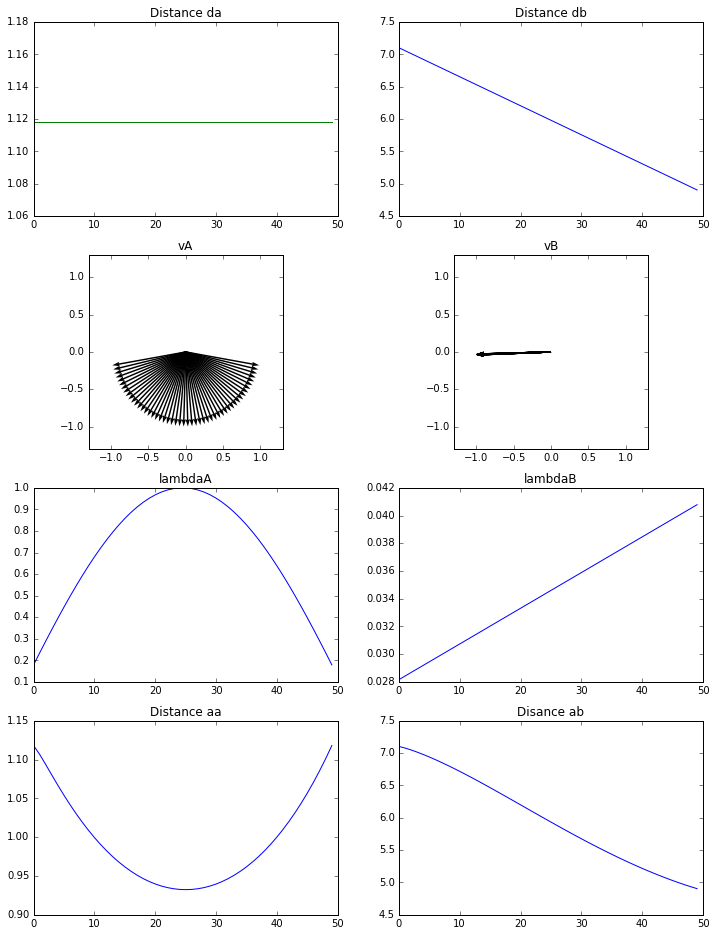

In [244]:
# Create Numpy arrays
A = PA_1.np()
B = PB_1.np()
C0 = C_0.np()
C1 = C_1.np()

# Set up interpolation vector
u = np.c_[np.linspace(0,1)]

# Set up the distance components of sigmaA, sigmaB
dA0 = la.norm(C0 - A)
dA1 = la.norm(C1 - A)
dB0 = la.norm(C0 - B)
dB1 = la.norm(C1 - B)

dA = np.linspace(dA0, dA1)
dB = np.linspace(dB0, dB1)

# Set up the vantage vector components of sigmaA, sigmaB
vA0 = (C0 - A) / dA0
vA1 = (C1 - A) / dA1
vB0 = (C0 - B) / dB0
vB1 = (C1 - B) / dB1

vA = np.apply_along_axis(lambda u : slerp(vA0,vA1,u), axis=1, arr=u)
vB = np.apply_along_axis(lambda u : slerp(vB0,vB1,u), axis=1, arr=u)

# Set up lambda by calculating the sin between the vantage vector v and the line of action AB
AB = B - A
lambdaA = (la.norm(np.cross(vA, AB),axis=1) / (la.norm(vA,axis=1) * la.norm(AB)))
lambdaB = (la.norm(np.cross(vB, AB),axis=1) / (la.norm(vB,axis=1) * la.norm(AB)))

# 
# Set up "a"
# This is the nasty one: We're *also* toric-interpolating the path
# then finding the distance along the vantage vector to this toric manifold
# and scaling by that.
#
def map_toric_to_cam(a):
    t = toric.Toric3(toric.RadianPi(a[0]),toric.Radian2Pi(a[1]),toric.RadianPi(a[2]))
    return toric.Toric3_ToWorldPositionNP(t, PB_1, PA_1)

C_0_toric = toric.Toric3_FromWorldPosition(C_0,PB_1,PA_1)
C_1_toric = toric.Toric3_FromWorldPosition(C_1,PB_1,PA_1)

alpha_lin, theta_lin, phi_lin = linspace_toric(
    C_0_toric.getAlpha().valueRadians(),
    C_1_toric.getAlpha().valueRadians(),
    C_0_toric.getTheta().valueRadians(),
    C_1_toric.getTheta().valueRadians(),
    C_0_toric.getPhi().valueRadians(),
    C_1_toric.getPhi().valueRadians())
    
P = np.c_[ alpha_lin, theta_lin, phi_lin ]
C = np.apply_along_axis(map_toric_to_cam, axis=1, arr=P)

aA = la.norm(C - A,axis=1)
aB = la.norm(C - B,axis=1)

# Set up sigmaA, sigmaB, sigma
sigmaA = A + vA * ((dA + lambdaA * aA)/(1 + lambdaA))[:,np.newaxis]
sigmaB = B + vB * ((dB + lambdaA * aB)/(1 + lambdaA))[:,np.newaxis]
sigma = (sigmaA + sigmaB) / 2

#
# Graphing the various components of Sigma
#
pylab.rcParams['figure.figsize'] = 12, 16

from matplotlib import gridspec
gs = gridspec.GridSpec(4, 2, width_ratios=[1,1], height_ratios=[1,1,1,1]) 
fig = plt.figure()

f1 = fig.add_subplot(gs[0])
f2 = fig.add_subplot(gs[1])
f3 = fig.add_subplot(gs[2])
f4 = fig.add_subplot(gs[3])
f5 = fig.add_subplot(gs[4])
f6 = fig.add_subplot(gs[5])
f7 = fig.add_subplot(gs[6])
f8 = fig.add_subplot(gs[7])

f1.plot(dA,c="green")
f1.set_title("Distance da")
f2.plot(dB,c="blue")
f2.set_title("Distance db")

f3.quiver(np.linspace(0,0), np.linspace(0,0), vA[:,0],vA[:,1],angles='xy',scale_units='xy',scale=1)
f3.set_ylim([-1.3,1.3])
f3.set_xlim([-1.3,1.3])
f3.set_title("vA")
f3.set_aspect('equal')

f4.quiver(np.linspace(0,0), np.linspace(0,0), vB[:,0],vB[:,1],angles='xy',scale_units='xy',scale=1)
f4.set_ylim([-1.3,1.3])
f4.set_xlim([-1.3,1.3])
f4.set_title("vB")
f4.set_aspect('equal')

f5.plot(lambdaA)
f5.set_title("lambdaA")

f6.plot(lambdaB)
f6.set_title("lambdaB")

f7.plot(aA)
f7.set_title("Distance aa")

f8.plot(aB)
f8.set_title("Disance ab")


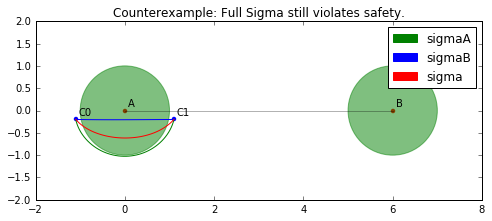

In [245]:
drawSetup(fudgeY_neg=2)
plt.plot(sigmaA[:,0],sigmaA[:,1], c="green")
plt.plot(sigmaB[:,0],sigmaB[:,1], c="blue")
plt.plot(sigma[:,0], sigma[:,1],  c="red")
plt.title("Counterexample: Full Sigma still violates safety.")

sA_legend = mpatches.Patch(color="green", label="sigmaA")

sB_legend = mpatches.Patch(color="blue", label="sigmaB")
S_legend  = mpatches.Patch(color="red", label="sigma")
plt.legend(handles=[sA_legend,sB_legend,S_legend])

# OK, this is bad - we're violating minimum distance. But is there a simple bound?

### Let's do a silly experiment - we move C0 much further out. Start 8m away from person rather than 1.1m

In [246]:
min_dist = 1                    # let's set a minimum distance of 1m
PA_1 = toric.Vector3(0,0,0)     # person A position
PB_1 = toric.Vector3(6,0,0)     # person B position
C_0 = toric.Vector3(-8.1,-0.2,0)  # Starting camera position is *outside* of PA_1
C_1 = toric.Vector3( 1.1,-0.2,0)    # Ending camera position

In [247]:
# Create Numpy arrays
A = PA_1.np()
B = PB_1.np()
C0 = C_0.np()
C1 = C_1.np()

# Set up interpolation vector
u = np.c_[np.linspace(0,1)]

# Set up the distance components of sigmaA, sigmaB
dA0 = la.norm(C0 - A)
dA1 = la.norm(C1 - A)
dB0 = la.norm(C0 - B)
dB1 = la.norm(C1 - B)

dA = np.linspace(dA0, dA1)
dB = np.linspace(dB0, dB1)

# Set up the vantage vector components of sigmaA, sigmaB
vA0 = (C0 - A) / dA0
vA1 = (C1 - A) / dA1
vB0 = (C0 - B) / dB0
vB1 = (C1 - B) / dB1

vA = np.apply_along_axis(lambda u : slerp(vA0,vA1,u), axis=1, arr=u)
vB = np.apply_along_axis(lambda u : slerp(vB0,vB1,u), axis=1, arr=u)

# Set up lambda by calculating the sin between the vantage vector v and the line of action AB
AB = B - A
lambdaA = (la.norm(np.cross(vA, AB),axis=1) / (la.norm(vA,axis=1) * la.norm(AB)))
lambdaB = (la.norm(np.cross(vB, AB),axis=1) / (la.norm(vB,axis=1) * la.norm(AB)))

# 
# Set up "a"
# This is the nasty one: We're *also* toric-interpolating the path
# then finding the distance along the vantage vector to this toric manifold
# and scaling by that.
#
def map_toric_to_cam(a):
    t = toric.Toric3(toric.RadianPi(a[0]),toric.Radian2Pi(a[1]),toric.RadianPi(a[2]))
    return toric.Toric3_ToWorldPositionNP(t, PB_1, PA_1)

C_0_toric = toric.Toric3_FromWorldPosition(C_0,PB_1,PA_1)
C_1_toric = toric.Toric3_FromWorldPosition(C_1,PB_1,PA_1)

alpha_lin, theta_lin, phi_lin = linspace_toric(
    C_0_toric.getAlpha().valueRadians(),
    C_1_toric.getAlpha().valueRadians(),
    C_0_toric.getTheta().valueRadians(),
    C_1_toric.getTheta().valueRadians(),
    C_0_toric.getPhi().valueRadians(),
    C_1_toric.getPhi().valueRadians())
    
P = np.c_[ alpha_lin, theta_lin, phi_lin ]
C = np.apply_along_axis(map_toric_to_cam, axis=1, arr=P)

aA = la.norm(C - A,axis=1)
aB = la.norm(C - B,axis=1)

# Set up sigmaA, sigmaB, sigma
sigmaA = A + vA * ((dA + lambdaA * aA)/(1 + lambdaA))[:,np.newaxis]
sigmaB = B + vB * ((dB + lambdaA * aB)/(1 + lambdaA))[:,np.newaxis]
sigma = (sigmaA + sigmaB) / 2

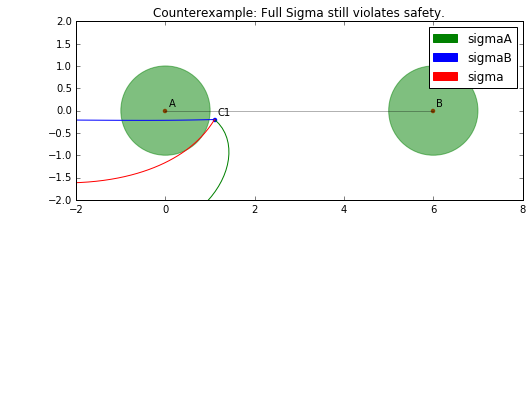

In [248]:
drawSetup(fudgeY_neg=2)
plt.plot(sigmaA[:,0],sigmaA[:,1], c="green")
plt.plot(sigmaB[:,0],sigmaB[:,1], c="blue")
plt.plot(sigma[:,0], sigma[:,1],  c="red")
plt.title("Counterexample: Full Sigma still violates safety.")

sA_legend = mpatches.Patch(color="green", label="sigmaA")

sB_legend = mpatches.Patch(color="blue", label="sigmaB")
S_legend  = mpatches.Patch(color="red", label="sigma")
plt.legend(handles=[sA_legend,sB_legend,S_legend])


# Conclusion...?

### Sadly, even this STILL violates the minimum distance. 

### That is: there is a complicated interplay between the angle and distance of the two camera positions and the two people positions that determines whether the path goes through the minimum distance space or not.  Let's explore this.

# Niels, do you have a bug?

I did prove this numerically with a counterexample. So a numerical bug might be present.

For the simpplified interpolation - no. The continuous math checks out. For the full - perhaps I did it wrong, yes.

### This might be the case. Let's consider a different example.


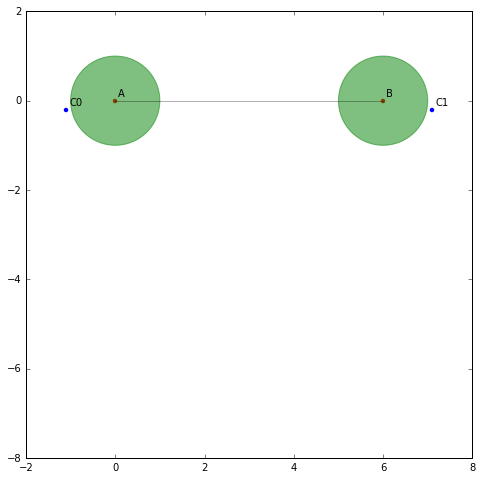

In [249]:
min_dist = 1                    # let's set a minimum distance of 1m
PA_1 = toric.Vector3(0,0,0)     # person A position
PB_1 = toric.Vector3(6,0,0)     # person B position
C_0 = toric.Vector3(-1.1,-0.2,0)  # Starting camera position is *outside* of PA_1
C_1 = toric.Vector3( 7.1,-0.2,0)    # Ending camera position

drawSetup()

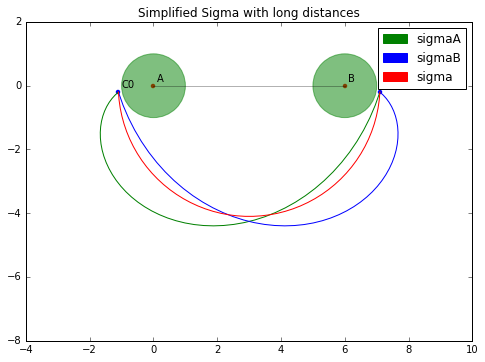

In [254]:
# Create Numpy arrays
A = PA_1.np()
B = PB_1.np()
C0 = C_0.np()
C1 = C_1.np()

# Set up interpolation vector
u = np.c_[np.linspace(0,1)]

# Set up the distance components of sigmaA, sigmaB
dA0 = la.norm(C0 - A)
dA1 = la.norm(C1 - A)
dB0 = la.norm(C0 - B)
dB1 = la.norm(C1 - B)

dA = np.linspace(dA0, dA1)
dB = np.linspace(dB0, dB1)

# Set up the vantage vector components of sigmaA, sigmaB
vA0 = (C0 - A) / dA0
vA1 = (C1 - A) / dA1
vB0 = (C0 - B) / dB0
vB1 = (C1 - B) / dB1

vA = np.apply_along_axis(lambda u : slerp(vA0,vA1,u), axis=1, arr=u)
vB = np.apply_along_axis(lambda u : slerp(vB0,vB1,u), axis=1, arr=u)

# Set up sigmaA, sigmaB, sigma
sigmaA = A + dA[:,np.newaxis] * vA
sigmaB = B + dB[:,np.newaxis] * vB
sigma = (sigmaA + sigmaB) / 2

drawSetup(fudgeY_neg=8, fudgeX=4)
plt.plot(sigmaA[:,0],sigmaA[:,1], c="green")
plt.plot(sigmaB[:,0],sigmaB[:,1], c="blue")
plt.plot(sigma[:,0], sigma[:,1],  c="red")
plt.title("Simplified Sigma with long distances")

sA_legend = mpatches.Patch(color="green", label="sigmaA")

sB_legend = mpatches.Patch(color="blue", label="sigmaB")
S_legend  = mpatches.Patch(color="red", label="sigma")
plt.legend(handles=[sA_legend,sB_legend,S_legend])

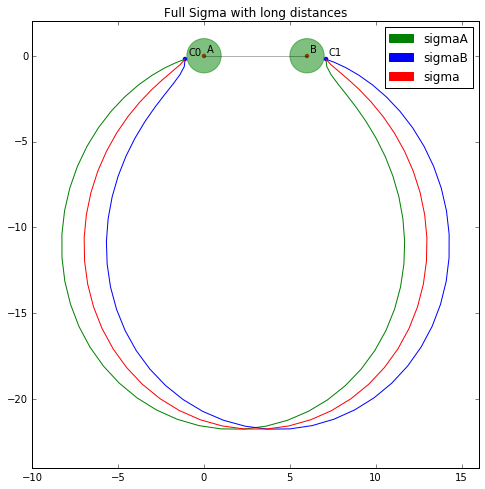

In [267]:
# Create Numpy arrays
A = PA_1.np()
B = PB_1.np()
C0 = C_0.np()
C1 = C_1.np()

# Set up interpolation vector
u = np.c_[np.linspace(0,1)]

# Set up the distance components of sigmaA, sigmaB
dA0 = la.norm(C0 - A)
dA1 = la.norm(C1 - A)
dB0 = la.norm(C0 - B)
dB1 = la.norm(C1 - B)

dA = np.linspace(dA0, dA1)
dB = np.linspace(dB0, dB1)

# Set up the vantage vector components of sigmaA, sigmaB
vA0 = (C0 - A) / dA0
vA1 = (C1 - A) / dA1
vB0 = (C0 - B) / dB0
vB1 = (C1 - B) / dB1

vA = np.apply_along_axis(lambda u : slerp(vA0,vA1,u), axis=1, arr=u)
vB = np.apply_along_axis(lambda u : slerp(vB0,vB1,u), axis=1, arr=u)

# Set up lambda by calculating the sin between the vantage vector v and the line of action AB
AB = B - A
lambdaA = (la.norm(np.cross(vA, AB),axis=1) / (la.norm(vA,axis=1) * la.norm(AB)))
lambdaB = (la.norm(np.cross(vB, AB),axis=1) / (la.norm(vB,axis=1) * la.norm(AB)))

# 
# Set up "a"
# This is the nasty one: We're *also* toric-interpolating the path
# then finding the distance along the vantage vector to this toric manifold
# and scaling by that.
#
def map_toric_to_cam(a):
    t = toric.Toric3(toric.RadianPi(a[0]),toric.Radian2Pi(a[1]),toric.RadianPi(a[2]))
    return toric.Toric3_ToWorldPositionNP(t, PB_1, PA_1)

C_0_toric = toric.Toric3_FromWorldPosition(C_0,PB_1,PA_1)
C_1_toric = toric.Toric3_FromWorldPosition(C_1,PB_1,PA_1)

alpha_lin, theta_lin, phi_lin = linspace_toric(
    C_0_toric.getAlpha().valueRadians(),
    C_1_toric.getAlpha().valueRadians(),
    C_0_toric.getTheta().valueRadians(),
    C_1_toric.getTheta().valueRadians(),
    C_0_toric.getPhi().valueRadians(),
    C_1_toric.getPhi().valueRadians())
    
P = np.c_[ alpha_lin, theta_lin, phi_lin ]
C = np.apply_along_axis(map_toric_to_cam, axis=1, arr=P)

aA = la.norm(C - A,axis=1)
aB = la.norm(C - B,axis=1)

# Set up sigmaA, sigmaB, sigma
sigmaA = A + vA * ((dA + lambdaA * aA)/(1 + lambdaA))[:,np.newaxis]
sigmaB = B + vB * ((dB + lambdaB * aB)/(1 + lambdaB))[:,np.newaxis]
sigma = (sigmaA + sigmaB) / 2

drawSetup(fudgeY_neg=24, fudgeX=10)
plt.plot(sigmaA[:,0],sigmaA[:,1], c="green")
plt.plot(sigmaB[:,0],sigmaB[:,1], c="blue")
plt.plot(sigma[:,0], sigma[:,1],  c="red")
plt.title("Full Sigma with long distances")

sA_legend = mpatches.Patch(color="green", label="sigmaA")

sB_legend = mpatches.Patch(color="blue", label="sigmaB")
S_legend  = mpatches.Patch(color="red", label="sigma")
plt.legend(handles=[sA_legend,sB_legend,S_legend])

Note: Above is the "correct" behavior that keeps them at the same place on screen.

## What is the correct behavior? Unclear...

## Obvious next step: Get their *actual* code running. Still - I'm doubtful.